# Reliance Trends is currently India's largest fashion retail chain. 

The chain currently operates over 700 stores all over India supplying Men, Women and children with clothes.

With the company being so big the question of if it would be possible to go international quickly arises. Would this chain work in Americ? 

- If so, who would it target? 
- What would it sell? 
- And most importantly, is it affordable enough that people would buy it? In this report I hope to answer all of these questions alike.

# Data Sources and Methods

To begin I found two data sets on Kaggle. 
  
- The first data set displays customers along with their gender, age, annual income, and spending score. For this project I only needed the gender and age.

- The second data set displays items sold at Reliance Trends and showcases the brand, price, category, gender alongside many other things and how they related to the product

In order to make the data set fit better for a US audience I converted the prices to dollars in contrast to rupees. I then filtered the data so that it could be used as two different data sets: Male and Female

From here I created several graphs that displayed the following

- Top Brands
- Top Categories by gender
- Average price of top categories 

This marked the end of my need for the second data set

I then moved back to the first data set that dispalyed customer data. I began by using the elbow test in order to determine how many clusters I would need. Afte determining that I would need 5 I used machine learning, a kmeans algorithm, to make clusters out of the data. I then made an identical graph except this second graph showcased where the centroids were. Finally, I made two graphs that showcased the orignal graph if it were to be filtered by gender i.e. 2 graphs that showcased gender patterns. 

In [1]:
import pandas as pd
import wordcloud as wc    
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#Gets data about average consumers
clothes = pd.read_csv("Mall_Customers.csv")

clothes

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
#Obtains data from data frame and cleans it by removing commas and dropping useless columns 

RTF = pd.read_csv("Reliance Trends Fashion.csv")

RTF = RTF.replace(',','', regex=True)

RTF = RTF.drop(columns=['Description','Image_URL', 'Product_ID', "Product_URL","Discount_Price (in Rs.)"])

RTF = RTF.sort_values(by='Original_Price (in Rs.)' , ascending = True)


RTF

,Brand,Original_Price (in Rs.),Category_by_gender,Category
13019,duke,1045,Men,Topwear
14278,duke,1045,Men,Topwear
30423,duke-women-s,1045,Women,Westernwear
12483,duke,1045,Men,Topwear
12954,duke,1045,Men,Topwear
...,...,...,...,...
19354,biba,9995,Women,Ethnicwear
17101,w,9999,Women,Ethnicwear
20134,w,9999,Women,Ethnicwear
19603,w,9999,Women,Ethnicwear


# Conversions 

Because this is an Indian data set it can be useful to have the price in dollars alongside with the price in Indian Rupees. This can help us to better understand if the product will be feasible to buy for American customers.

In [3]:
amountInDollars = []
for values in RTF['Original_Price (in Rs.)' ]:
    amountInDollars.append(int(values) * .012)
    
RTF["Price"] = amountInDollars

RTF

,Brand,Original_Price (in Rs.),Category_by_gender,Category,Price
13019,duke,1045,Men,Topwear,12.540
14278,duke,1045,Men,Topwear,12.540
30423,duke-women-s,1045,Women,Westernwear,12.540
12483,duke,1045,Men,Topwear,12.540
12954,duke,1045,Men,Topwear,12.540
...,...,...,...,...,...
19354,biba,9995,Women,Ethnicwear,119.940
17101,w,9999,Women,Ethnicwear,119.988
20134,w,9999,Women,Ethnicwear,119.988
19603,w,9999,Women,Ethnicwear,119.988


# A Word Cloud displaying the most common brands  

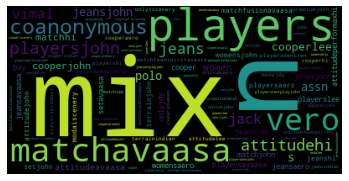

In [4]:
from wordcloud import WordCloud  

brandList = ""
for words in RTF['Brand']:
    brandList += (words)

cloud = wc.WordCloud() 

wordCloud = cloud.generate(brandList)
wordCloud = WordCloud(collocations=False).generate(brandList)

plt.axis('off')
plt.imshow(wordCloud) 


# Gender

Becuase the majority of clothing stores operate with different sections for men and women it can be useful to seperate the data set into two categories in order to make better decisions regarding clothing for each gender

In [5]:
fRTF = RTF.loc[RTF['Category_by_gender'] == "Women"]
mRTF = RTF.loc[RTF['Category_by_gender'] == "Men"]

# Below lists the top clothing categories for males and females 

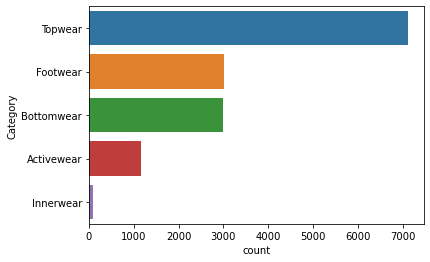

In [6]:
sns.countplot(y = 'Category' , data = mRTF, order=pd.value_counts(mRTF['Category']).iloc[:10].index)

plt.show()

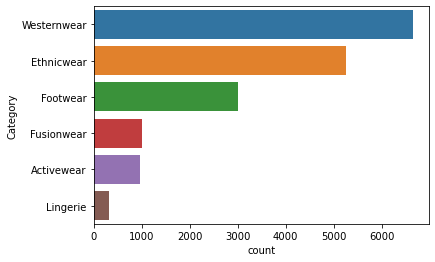

In [7]:
sns.countplot(y = 'Category' , data = fRTF, order=pd.value_counts(fRTF['Category']).iloc[:10].index)

plt.show()

# Pricing

In order to determine the average price of a garment from one of the catergoies I calculated the mean of the garments for each category 

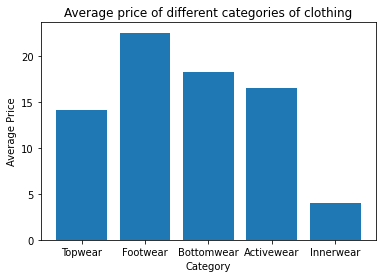

In [8]:
topWear = mRTF.loc[RTF['Category'] == "Topwear"]
mFootWear = mRTF.loc[RTF['Category'] == "Footwear"]
bottomWear = mRTF.loc[RTF['Category'] == "Bottomwear"]
mActiveWear = mRTF.loc[RTF['Category'] == "Activewear"]
innerWear = mRTF.loc[RTF['Category'] == "Innerwear"]

#Function to get the average price for a category of clothing 
def averagePrice(df):
    totalPrice = 0
    
    for prices in df['Price']:
        totalPrice += int(prices)

    return totalPrice/len(df['Price'])
                          
topWearAverage = averagePrice(topWear)
mFootWearAverage = averagePrice(mFootWear)
bottomWearAverage = averagePrice(bottomWear)
mActiveWearAverage = averagePrice(mActiveWear)
innerWearAverage = averagePrice(innerWear)

averages = [topWearAverage, mFootWearAverage, bottomWearAverage, mActiveWearAverage, innerWearAverage]
categories = ["Topwear", "Footwear", "Bottomwear", "Activewear", "Innerwear"]

fig = plt.figure()

#Plots all of the categories with their average price 
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.title("Average price of different categories of clothing")

plt.bar(categories, averages)

plt.show()



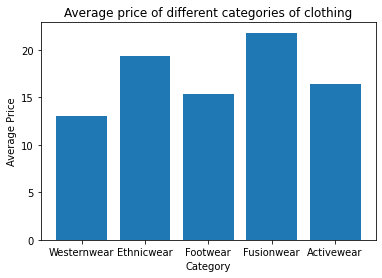

In [9]:
westWear = fRTF.loc[RTF['Category'] == "Westernwear"]
ethnicWear = fRTF.loc[RTF['Category'] == "Ethnicwear"]
footWear = fRTF.loc[RTF['Category'] == "Footwear"]
fusionWear = fRTF.loc[RTF['Category'] == "Fusionwear"]
activeWear = fRTF.loc[RTF['Category'] == "Activewear"]

                          
westWearAverage = averagePrice(westWear)
ethnicWearAverage = averagePrice(ethnicWear)
footWearAverage = averagePrice(footWear)
fusionWearAverage = averagePrice(fusionWear)
activeWearAverage = averagePrice(activeWear)

averages = [westWearAverage, ethnicWearAverage, footWearAverage, fusionWearAverage, activeWearAverage]
categories = ["Westernwear", "Ethnicwear", "Footwear", "Fusionwear", "Activewear"]

fig = plt.figure()

plt.xlabel("Category")
plt.ylabel("Average Price")
plt.title("Average price of different categories of clothing")

plt.bar(categories, averages)

plt.show()



In [10]:
#Array of age and annual income 

x = clothes.iloc[:, [2,3]].values


# Elbow Test

Created an elbow plot in order to determine how many clusters would be needed 

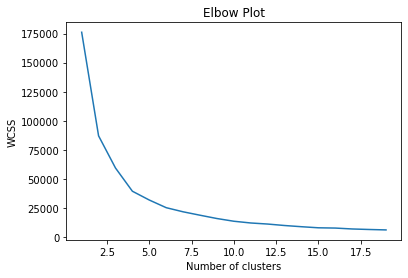

In [11]:
#Creates an elbow plot 
wcss = []

for i in range (1, 20):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state= 45)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
fig = plt.figure()

plt.plot(range(1,20), wcss)

plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Plot")

plt.show()

In [12]:
#Clustering algorithm 
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state= 45)
y_kmeans = kmeans.fit_predict(x)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_


# Unsupervised Learning

Creates the plot with 5 groups 

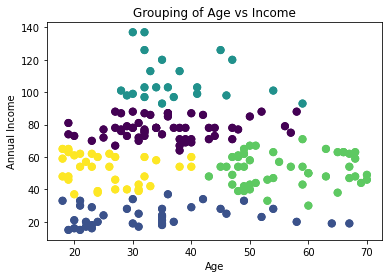

In [13]:
plt.scatter(x[:,0],x[:,1], c = y_kmeans, s = 50)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_

plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Grouping of Age vs Income")

plt.scatter(x[:, 0], x[:,1], c = y_kmeans, s = 50)


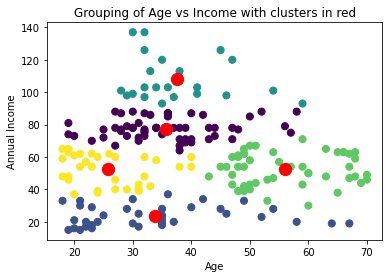

In [14]:
#Shows the plot with the centroids 

plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Grouping of Age vs Income with clusters in red")

plt.scatter(x[:, 0], x[:,1], c = y_kmeans, s = 50)
plt.scatter(centroid[:,0], centroid[:,1], s = 150, c = "red")

# Gender

Creates two plots based on gender 

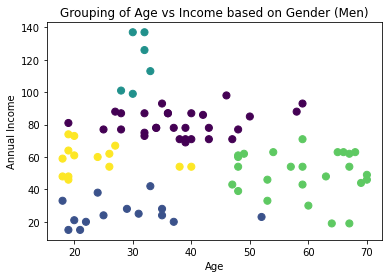

In [15]:
mensClothes = clothes.loc[clothes['Gender'] == "Male"]

men = mensClothes.iloc[:, [2,3]].values

#Clustering algorithm 
y_kmeans = kmeans.fit_predict(men)

plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Grouping of Age vs Income based on Gender (Men)")
plt.scatter(men[:, 0], men[:,1], c = y_kmeans, s = 50)


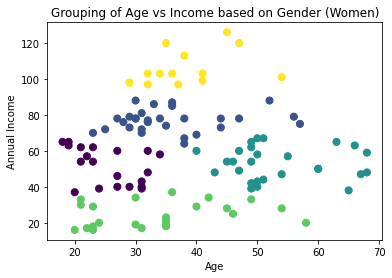

In [16]:
femaleClothes = clothes.loc[clothes['Gender'] == "Female"]

female = femaleClothes.iloc[:, [2,3]].values

#Clustering algorithm 
y_kmeans = kmeans.fit_predict(female)

plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Grouping of Age vs Income based on Gender (Women)")
plt.scatter(female[:, 0], female[:,1], c = y_kmeans, s = 50)


# Who buys the most clothes

People aged between 25 and 34 were the biggest purchasers in the apparel market. It is therefore reasonable to suggest that Reliance Trends begin its move toward becoming an international business by targeting this age bracket.

Based on our data we can see that this leaves us with a target market of 3 main groups. 

- The green group which has an annual income of about 10k - 40k
- The purple group which has an annual income of about 40 - 65k
- The blue group which has an annual income of about 65 - 90k

With Reliance Trends having its top brands sell at under 20 dollars it is resonable to think that this will mean that all customers will be able to buy clothes easily. However it is important to note that clothing is about 36% cheaper in India than in the US. Therefore we must mark up the price in order to account for this. 

This results in all clothes from Reliance Trends being about 15 - 25 dollars.

Considering American customers shouldn't spend more than 5% of their monthly income on clothes lets compare our target market

In [17]:
#Gets rid of everyone who makes over 90k as well as peopel who are not in the correct age range

femaleTM = femaleClothes[femaleClothes['Annual Income (k$)'] < 90]
femaleTM = femaleClothes[femaleClothes['Age'] < 25]
femaleTM = femaleClothes[femaleClothes['Age'] > 34]

clothingBudget = []

#Creates column to determine monthly clothing budget
for monthlyIncome in femaleTM['Annual Income (k$)']:
    clothingBudget.append(round(((monthlyIncome / 12) *.05) * 1000))
    
femaleTM["Clothing Budget"] = clothingBudget

femaleTM

/var/folders/0x/1djd9z2s7pl4ctq9ghw68d7r0000gn/T/ipykernel_1049/319329270.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  femaleTM["Clothing Budget"] = clothingBudget


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clothing Budget
6,7,Female,35,18,6,75
11,12,Female,35,19,99,79
12,13,Female,58,20,15,83
16,17,Female,35,21,35,88
19,20,Female,35,23,98,96
...,...,...,...,...,...,...
189,190,Female,36,103,85,429
193,194,Female,38,113,91,471
194,195,Female,47,120,16,500
195,196,Female,35,120,79,500


In [18]:
#Gets rid of everyone who makes over 90k and who is to old/young

maleTM = mensClothes[mensClothes['Annual Income (k$)'] < 90]
maleTM = mensClothes[mensClothes['Age'] < 25]
maleTM = mensClothes[mensClothes['Age'] > 34]

clothingBudget = []

#Creates column to determine monthly clothing budget
for monthlyIncome in maleTM['Annual Income (k$)']:
    clothingBudget.append(round(((monthlyIncome / 12) *.05) * 1000))

maleTM["Clothing Budget"] = clothingBudget

/var/folders/0x/1djd9z2s7pl4ctq9ghw68d7r0000gn/T/ipykernel_1049/2932251601.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maleTM["Clothing Budget"] = clothingBudget


# With this data we can see that customers can buy on average anywhere from 4 to 24 clothes per month! 

This means that we will very likely be able to make a profit if we were to target this market

# Conclusions

Based on our findings we can determine that Reliance Trends should be able to move internationally into the American market. The target market should be the following

- 25 to 34 year olds (Millenials) 
- Low to Middle income earners 
- Women intersted in buying Westernwear, Ethnicwear, Footwear, Fusionwear, Activewear
- Men interested in buying Topwear, Footwear, Bottomwear, Activewear, Innerwear

In terms of articles of clothing we can estimate that between 4 and 24 items of clothing will be bought by each customer who is a part of our target market 

# References

-https://www.kaggle.com/datasets/manishmathias/fashion-reliance-trends

-https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

-https://www.statista.com/forecasts/480940/clothes-and-accessories-e-commerce-users-by-age-digital-market-outlook--uk#:~:text=While%20people%20aged%20between%2025,than%20any%20other%20age%20group.
